In [68]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, LSTM, Input

In [69]:
# 1. Load Dataset
df = pd.read_csv('/content/drive/MyDrive/UTS pembelajran mendalam /water_potability.csv')
df.fillna(df.mean(), inplace=True)

X = df.drop('Potability', axis=1).values
y = df['Potability'].values

In [70]:
# Cek data
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


**Data Preparation (Preprocessing)**

In [71]:
# 2. DATA PREPARATION (PREPROCESSING)
# ==========================================================
# Mengisi nilai yang kosong dengan rata-rata (Mean Imputation)
# Solusi agar model tidak error karena data kosong
df.fillna(df.mean(), inplace=True)

# Memisahkan Fitur dan Target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Scaling Data (MinMaxScaler) - Menyamakan rentang nilai agar model stabil
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✅ Data Siap! Training: {len(X_train)}, Testing: {len(X_test)}")


✅ Data Siap! Training: 2620, Testing: 656


**Algoritma 1: CNN (Convolutional Neural Network)**

In [72]:
def build_cnn():
    model = Sequential([
        Input(shape=(X_train.shape[1], 1)),
        Conv1D(32, kernel_size=2, activation='relu'),
        Dropout(0.2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = build_cnn()
cnn_model.summary()
history_cnn = cnn_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=0)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 8, 32)          │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,609 (64.88 KB)

 Trainable params: 16,609 (64.88 KB)

 Non-trainable params: 0 (0.00 B)

**Algoritma 2: DNN (Deep Neural Network / MLP)**

In [73]:
def build_dnn():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

dnn_model = build_dnn()
history_dnn = dnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

**Algoritma 3: LSTM (Long Short-Term Memory)**

In [74]:
def build_lstm():
    model = Sequential([
        Input(shape=(X_train.shape[1], 1)),
        LSTM(64, activation='tanh'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model = build_lstm()
history_lstm = lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=0)

**Evaluasi dan Perbandingan Model**

In [75]:
models_dl = {
    "CNN": (cnn_model, X_test_reshaped),
    "DNN": (dnn_model, X_test),
    "LSTM": (lstm_model, X_test_reshaped)
}

for name, (model, data_test) in models_dl.items():
    y_pred_prob = model.predict(data_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n--- Model: {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

--- Model: CNN ---
Accuracy: 0.6845
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       400
           1       0.70      0.34      0.46       256

    accuracy                           0.68       656
   macro avg       0.69      0.62      0.62       656
weighted avg       0.69      0.68      0.65       656

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

--- Model: DNN ---
Accuracy: 0.6555
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       400
           1       0.59      0.37      0.45       256

    accuracy                           0.66       656
   macro avg       0.63      0.60      0.60       656
weighted avg       0.64      0.66      0.63       656

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

--- Model: LSTM ---
Accuracy: 0.6098
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
       

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/tmp/ipython-input-936291731.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette=colors)


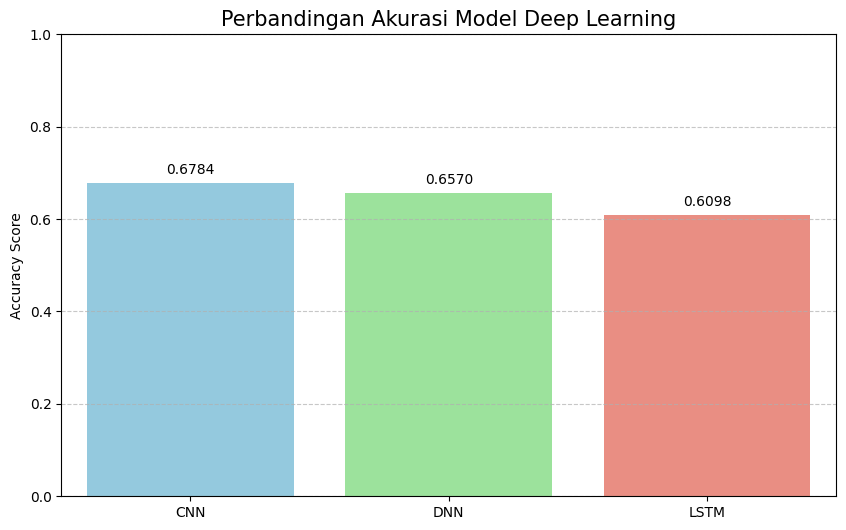

🏆 Model Terbaik adalah: CNN dengan Akurasi: 0.6784


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Menghitung Akurasi untuk masing-masing model
# Memastikan kita mengambil data dari hasil evaluasi sebelumnya
scores = {
    "CNN": accuracy_score(y_test, (cnn_m.predict(X_test_dl) > 0.5).astype(int)),
    "DNN": accuracy_score(y_test, (dnn_m.predict(X_test) > 0.5).astype(int)),
    "LSTM": accuracy_score(y_test, (lstm_m.predict(X_test_dl) > 0.5).astype(int))
}

# 2. Membuat Grafik Batang (Bar Chart)
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'lightgreen', 'salmon']
ax = sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette=colors)

# Menambahkan label angka di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Perbandingan Akurasi Model Deep Learning', fontsize=15)
plt.ylabel('Accuracy Score')
plt.ylim(0, 1.0) # Rentang akurasi 0 sampai 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Menentukan dan Mencetak Model Terbaik
best_model_name = max(scores, key=scores.get)
print(f"🏆 Model Terbaik adalah: {best_model_name} dengan Akurasi: {scores[best_model_name]:.4f}")

In [77]:
import os
import pandas as pd

# 5. CEK LOKASI FILE DATASET
# ==========================================================
def find_csv_path(filename):
    for root, dirs, files in os.walk('/content'): # Mencari di direktori Colab
        if filename in files:
            return os.path.join(root, filename)
    return None

FILE_NAME = 'water_potability.csv'
PATH_DATASET = find_csv_path(FILE_NAME)

if PATH_DATASET:
    df = pd.read_csv(PATH_DATASET)
    print(f"✅ Dataset ditemukan di: {PATH_DATASET}")
    print(f"📊 Jumlah Data: {df.shape[0]} baris, {df.shape[1]} kolom")
    print(f"📂 Kolom yang tersedia: {list(df.columns)}")
else:
    print(f"❌ File {FILE_NAME} tidak ditemukan. Silakan upload ke Google Colab.")

# Melihat 5 data teratas
df.head()

✅ Dataset ditemukan di: /content/uasdeeplearning-kelayakan-minum-air/water_potability.csv
📊 Jumlah Data: 3276 baris, 10 kolom
📂 Kolom yang tersedia: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


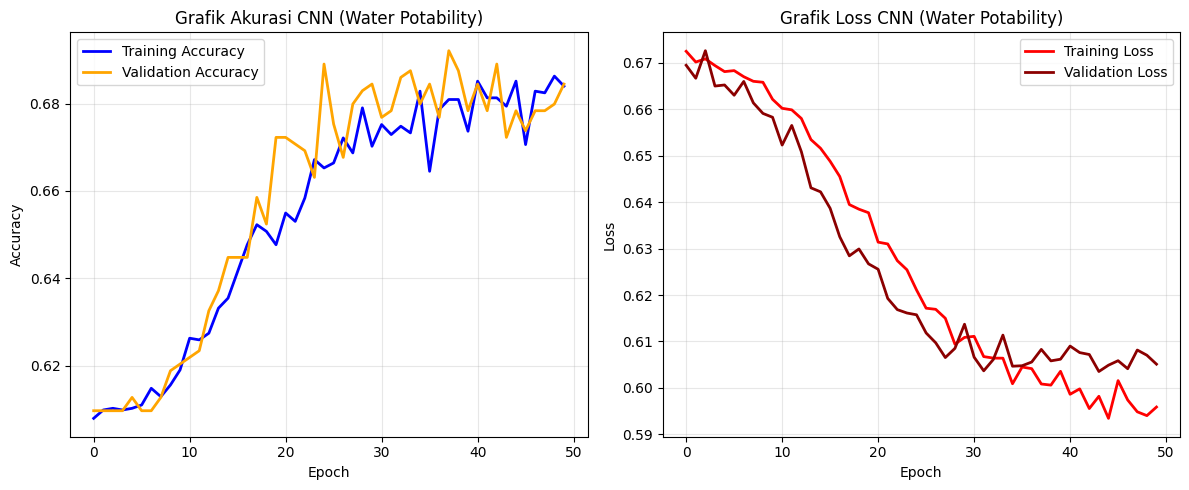

In [78]:
plt.figure(figsize=(12, 5))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2)
plt.title('Grafik Akurasi CNN (Water Potability)', fontsize=12)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss', color='red', linewidth=2)
plt.plot(history_cnn.history['val_loss'], label='Validation Loss', color='darkred', linewidth=2)
plt.title('Grafik Loss CNN (Water Potability)', fontsize=12)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


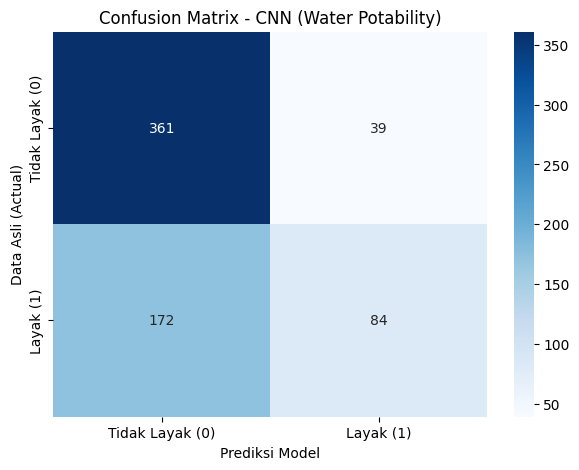


--- Laporan Klasifikasi Detil ---
              precision    recall  f1-score   support

           0       0.68      0.90      0.77       400
           1       0.68      0.33      0.44       256

    accuracy                           0.68       656
   macro avg       0.68      0.62      0.61       656
weighted avg       0.68      0.68      0.64       656



In [79]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prediksi data test menggunakan model CNN
y_pred_prob = cnn_m.predict(X_test_dl)
y_pred = (y_pred_prob > 0.5).astype(int)

# 2. Membuat hitungan matriks
cm = confusion_matrix(y_test, y_pred)

# 3. Visualisasi Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Layak (0)', 'Layak (1)'],
            yticklabels=['Tidak Layak (0)', 'Layak (1)'])

plt.title('Confusion Matrix - CNN (Water Potability)')
plt.xlabel('Prediksi Model')
plt.ylabel('Data Asli (Actual)')
plt.show()

# Menampilkan angka presisi, recall, dan f1-score
print("\n--- Laporan Klasifikasi Detil ---")
print(classification_report(y_test, y_pred))

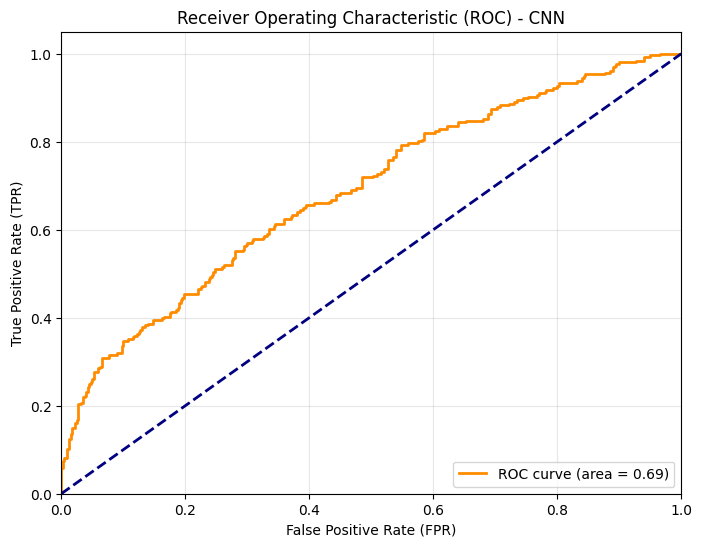

Hasil Akhir AUC: 0.6875


In [80]:
from sklearn.metrics import roc_curve, auc

# 1. Hitung False Positive Rate dan True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# 2. Plotting Kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Garis acak

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) - CNN')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"Hasil Akhir AUC: {roc_auc:.4f}")

In [81]:
import pickle

# simpan model
with open("model_air.pkl", "wb") as f:
    pickle.dump(model, f)

# simpan scaler
with open("scaler_air.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("model_air.pkl & scaler_air.pkl berhasil dibuat")


model_air.pkl & scaler_air.pkl berhasil dibuat


In [82]:
from google.colab import files
files.download("model_air.pkl")
files.download("scaler_air.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>